____
__Universidad Tecnológica Nacional, Buenos Aires__\
__Ingeniería Industrial__\
__Autor: Martin Palazzo__ \
__Cátedra de Investigación Operativa - Curso I4051 - Turno Miércoles Noche__
____

# **Zafari por distribuciones de probabilidad y primeras simulaciones**

### **Import Libraries**

In [216]:
# Importamos las librerias escenciales
import random
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import uniform
import seaborn as sns
import scipy.stats as ss

### **Histograma de frecuencias**
Generamos tres vectores cada uno con 500 posiciones. Cada posicion corresponde al sampleo/muestreo de una variable aleatoria que sigue una distribucion de probabilidad f(x)

In [217]:
# distribucion 1
d1 = np.random.laplace(loc=15, scale=3, size=500)

# distribucion 2
d2 = np.random.laplace(loc=25, scale=5, size=500)

# distribucion 3
d3 = d1 + d2

In [218]:
type(d1)

numpy.ndarray

In [219]:
np.shape(d1)

(500,)

In [220]:
# visualizamos los primeros 10 elementos (del 0 al 9) del vector d1
d1[:10]

array([13.84333265, 14.46835554, 10.53680442, 15.42322244, 12.46496262,
       18.38332338, 11.66763003, 17.86242823, 15.19278875, 13.30248039])

In [221]:
# visualizamos los primeros 10 elementos (del 0 al 9) del vector d2
d2[:10]

array([25.95141216, 22.39987591, 20.77905378,  7.79783888, 41.54265203,
       17.19658634, 16.1289484 , 22.866528  , 23.41540769, 25.171595  ])

In [222]:
# visualizamos los primeros 10 elementos (del 0 al 9) del vector d3
d3[:10]

array([39.79474482, 36.86823145, 31.3158582 , 23.22106133, 54.00761464,
       35.57990972, 27.79657843, 40.72895623, 38.60819644, 38.47407538])

Visualizar los vectores muestreados aleatoriamente de distribuciones de probabilidad (que a priori no conocemos) puede ser engorroso. Para eso usaremos el histograma de frecuencias y enteder que 

$$
n_k = \sum \delta (x_{(kj)}) 
$$

siendo $k$ la cantidad de cajas (bins) y $\delta$ la funcion identidad con cada muestra. 

$$
\delta (x_{(kj)}) = 1
$$


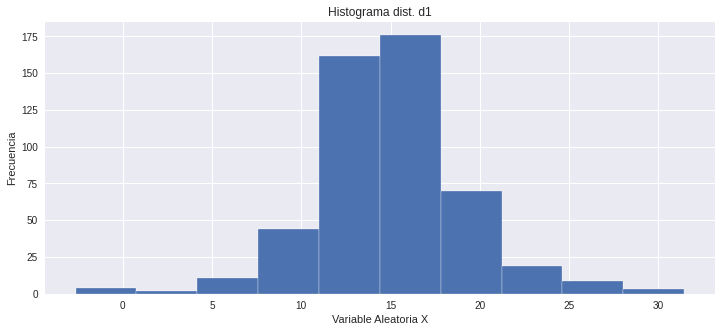

In [223]:
# realizamos un histograma con matplotlib
plt.figure(figsize= (12,5))
plt.hist(d1)
plt.title('Histograma dist. d1')
plt.ylabel('Frecuencia')
plt.xlabel('Variable Aleatoria X')
plt.show()

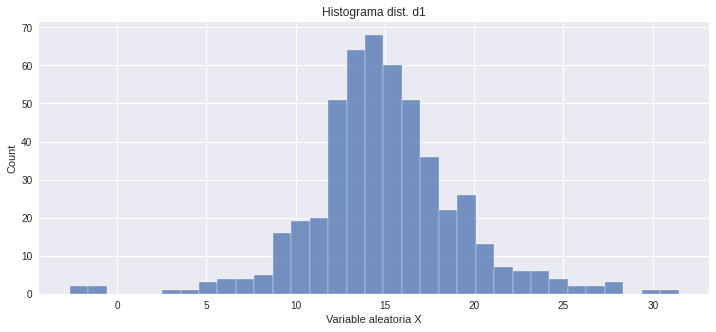

In [224]:
# realizamos un histograma con seaborn
plt.figure(figsize= (12,5))
sns.histplot(d1)
plt.title('Histograma dist. d1')
plt.xlabel('Variable aleatoria X')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



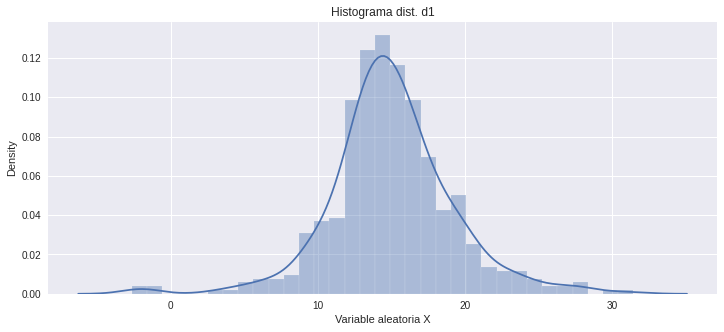

In [225]:
# realizamos un displot con seaborn
plt.figure(figsize= (12,5))
sns.distplot(d1)
plt.title('Histograma dist. d1')
plt.xlabel('Variable aleatoria X')
plt.show()

Visualizamos la siguiente combinacion de distribuciones:
- solo d1
- solo d2
- d1 y d2 en el mismo grafico
- d1 + d2

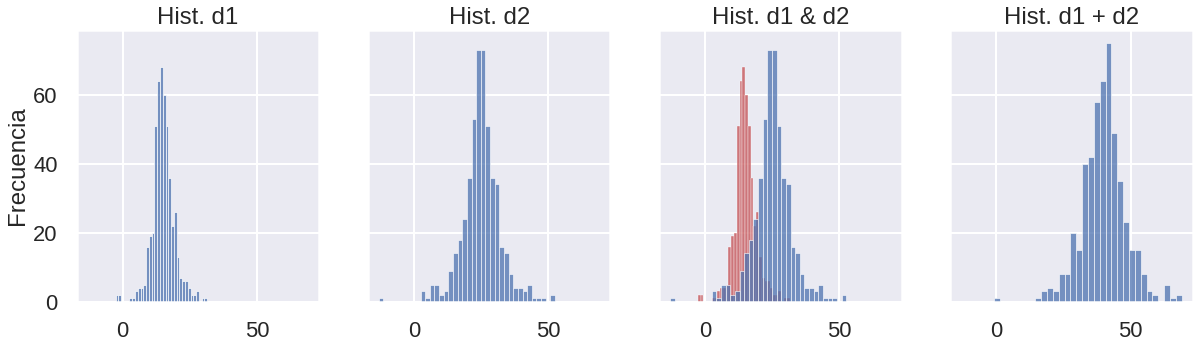

In [226]:
# configuramos la figura
sns.set_context("poster")
fig, ax = plt.subplots(1,4, sharex=True, sharey = True, figsize= (20,5))

# definimos en que posicion va cada histograma
sns.histplot(d1, ax = ax[0])
sns.histplot(d2, ax = ax[1])
sns.histplot(d1, ax = ax[2], color = 'r')
sns.histplot(d2, ax = ax[2])
sns.histplot(d1+d2, ax = ax[3])

# ponemos los titulos
ax[0].set_ylabel('Frecuencia')
ax[0].set_title('Hist. d1')
ax[1].set_title('Hist. d2')
ax[2].set_title('Hist. d1 & d2')
ax[3].set_title('Hist. d1 + d2')
plt.show()

Tambien podemos visualizar en 2D una densidad que este caracterizada por dos variables aleatorias en simultaneo. En este caso obtenemos una densidad nueva 

$$D(d1, d2)$$

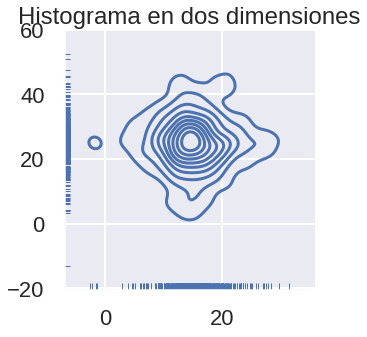

In [227]:
# visualizamos con distplot la densidad en dos dimensiones

sns.displot(x=d1, y=d2, kind="kde", rug=True)
plt.title('Histograma en dos dimensiones')
plt.show()

In [271]:

# cantidad de veces a tirar el dado
tiradas = 1000

# umbral para ganar 
umbral = 7

# definir funcion de dos dados, que luego se suman
def dado(n):
    total1 = 0
    total2 = 0
    for i in range(n):
        total1 += random.randint(1, 6)
        total2 += random.randint(1, 6)    
    total = total1 + total2
    return total


# crear vector resultados para guardar la suma del dado 1 y dado 2 en cada tirada
resultados = np.zeros(tiradas)
for g in range(0,tiradas):
    resultados[g] = np.round(dado(1))


# ir acumulando el dinero ganado en cada tirada
total = np.zeros(tiradas)
tot = 0
for t in range(0,np.shape(resultados)[0]):
    if resultados[t]<umbral:
        total[t] = tot - 1
        tot = tot - 1
    if resultados[t]>umbral:
        total[t] = tot + 1
        tot = tot + 1



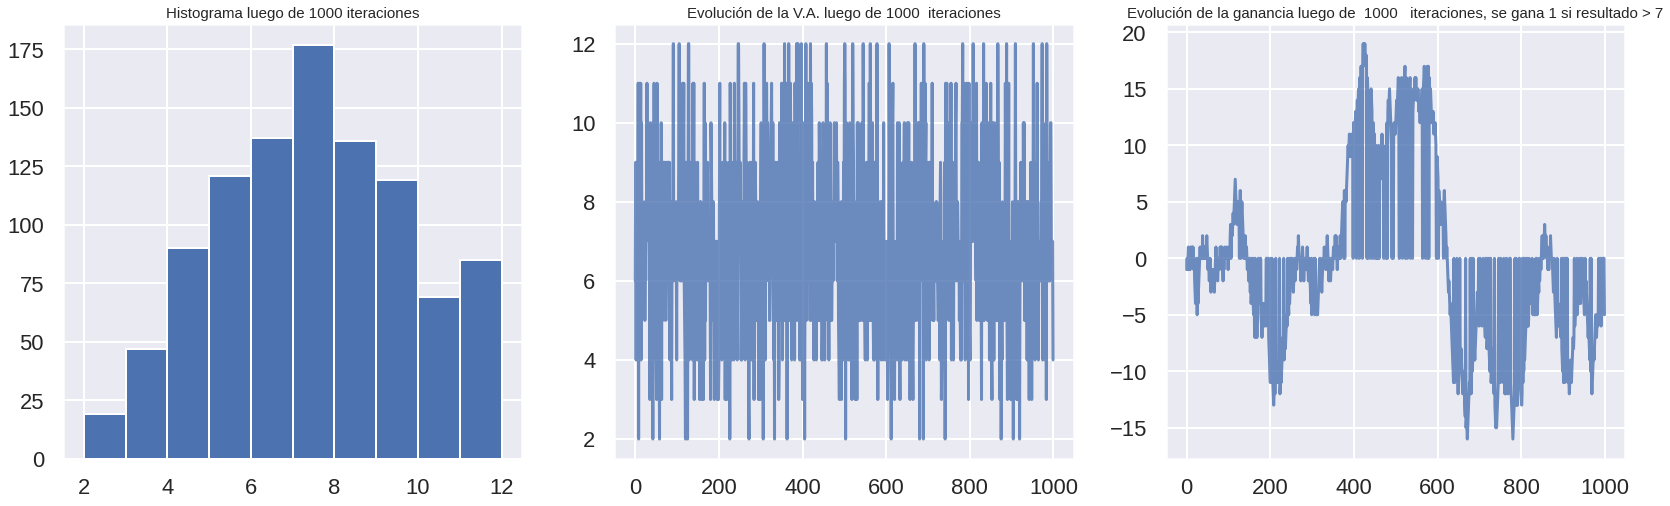

In [272]:
fig, ax = plt.subplots(1,3, sharex=False, figsize= (28,8), sharey = False)

ax[0].hist(resultados,color = 'b')
ax[1].plot(range(0, np.shape(resultados)[0]),resultados, color = 'b', alpha = 0.8)
ax[2].plot(range(0,np.shape(resultados)[0]),total, color = 'b', alpha = 0.8)

ax[0].set_title('Histograma luego de ' + str(tiradas) +' iteraciones', size=15)
ax[1].set_title('Evolución de la V.A. luego de ' + str(tiradas) +'  iteraciones', size=15)
ax[2].set_title('Evolución de la ganancia luego de  ' + str(tiradas) +'   iteraciones, se gana 1 si resultado > 7', size=15)

plt.show()


## **Distribucion uniforme**

Funcion de densidad
$$
f(x) = \left\{\begin{matrix}
\frac{1}{b-a} & \text{if} & a \leq x \leq b \\ 
0 & \text{else} &   
\end{matrix}\right.
$$

Funcion acumulada
$$
F(x) = \left\{\begin{matrix}
0 & \text{if} & x < a \\ 
\frac{x-a}{b-a} & \text{if} & a \leq x \leq b \\ 
1 & \text{if} & x > b   
\end{matrix}\right.
$$

In [230]:
# random numbers from uniform distribution
n = 50000
start = 10
width = 20
n_bins = 50

data_uniform_0 = uniform.rvs(size=10, loc = start, scale=width)
data_uniform_1 = uniform.rvs(size=100, loc = start, scale=width)
data_uniform_2 = uniform.rvs(size=1000, loc = start, scale=width)
data_uniform_3 = uniform.rvs(size=10000, loc = start, scale=width)

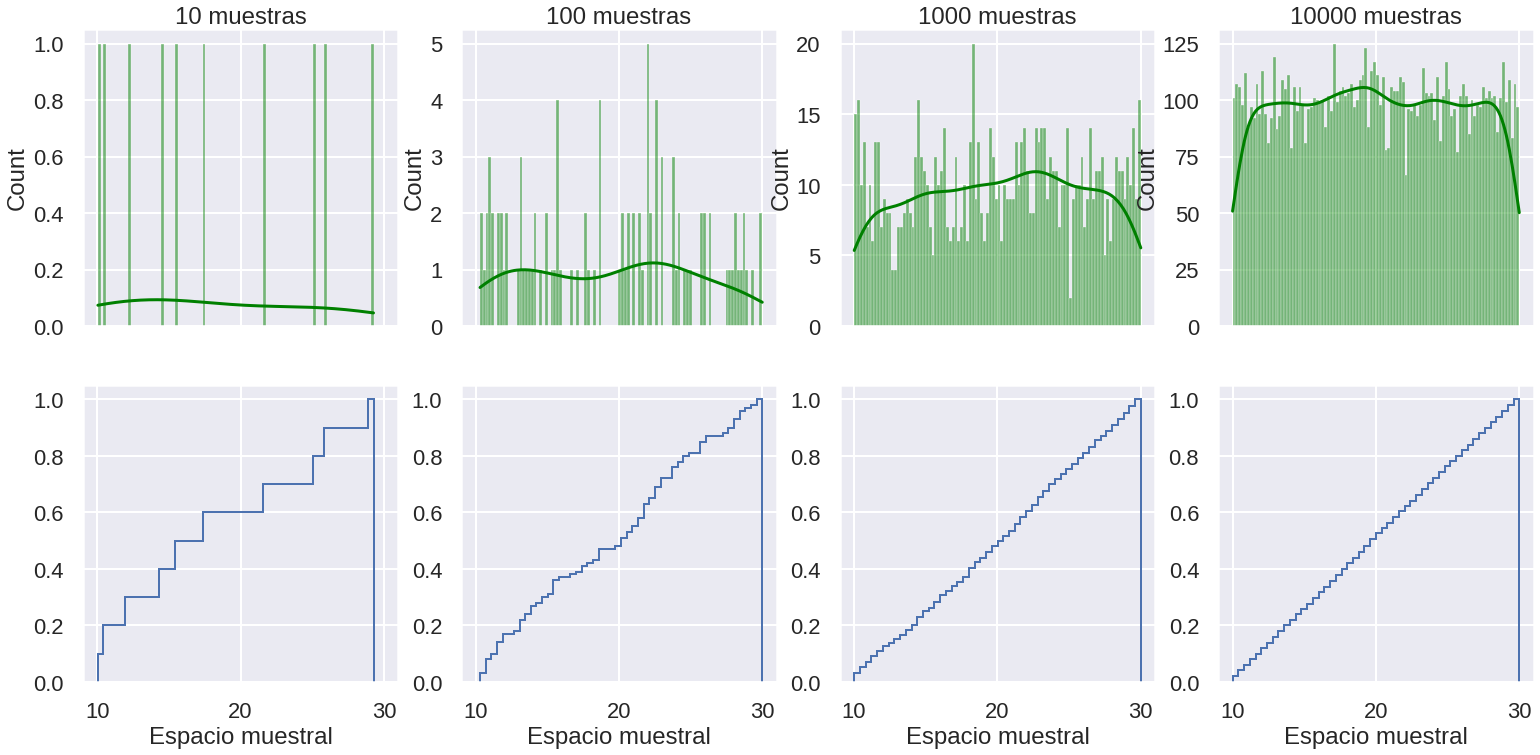

In [242]:
fig, ax = plt.subplots(2,4, sharex=True, figsize= (26,12), sharey = False)

sns.histplot(data_uniform_0, bins=100, kde=True, color='green',ax= ax[0,0] )
sns.histplot(data_uniform_1, bins=100, kde=True, color='green',ax= ax[0,1] )
sns.histplot(data_uniform_2, bins=100, kde=True, color='green',ax= ax[0,2] )
sns.histplot(data_uniform_3, bins=100, kde=True, color='green',ax= ax[0,3] )

ax[1,0].hist(data_uniform_0, n_bins, density=True, histtype='step', cumulative=True, label='Empirical')
ax[1,1].hist(data_uniform_1, n_bins, density=True, histtype='step', cumulative=True, label='Empirical')
ax[1,2].hist(data_uniform_2, n_bins, density=True, histtype='step', cumulative=True, label='Empirical')
ax[1,3].hist(data_uniform_3, n_bins, density=True, histtype='step', cumulative=True, label='Empirical')

ax[0,0].set_title('10 muestras')
ax[0,1].set_title('100 muestras')
ax[0,2].set_title('1000 muestras')
ax[0,3].set_title('10000 muestras')

ax[1,0].set_xlabel('Espacio muestral')
ax[1,1].set_xlabel('Espacio muestral')
ax[1,2].set_xlabel('Espacio muestral')
ax[1,3].set_xlabel('Espacio muestral')

plt.show()

## **Dist Gaussiana**

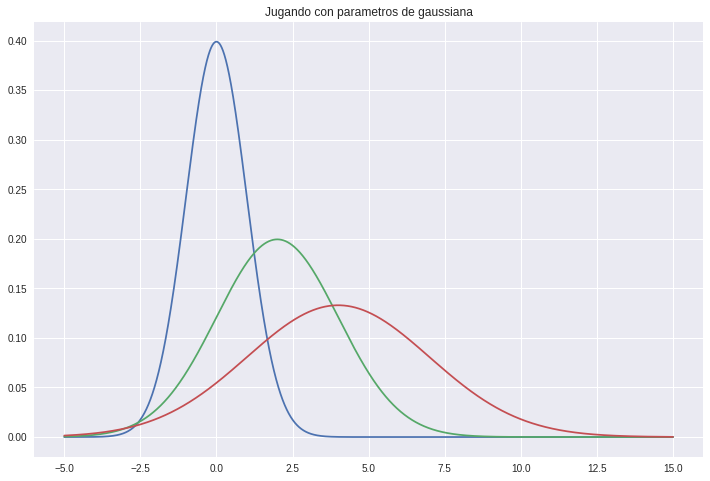

In [232]:

####### Funcion de probabilidad de densidad gaussiana #######

def gaussiana(mu, sigma):
  y = (1 / (np.sqrt(2 * np.pi * np.power(sigma, 2)))) * \
    (np.power(np.e, -(np.power((x - mu), 2) / (2 * np.power(sigma, 2)))))
  return y

plt.style.use('seaborn') # pretty matplotlib plots
plt.rcParams['figure.figsize'] = (12, 8)


# ploteamos la funcion de densidad
x = np.linspace(-5, 15, 5000)
mu1 = 0
mu2 = 2
mu3 = 4
sigma1 = 1
sigma2 = 2
sigma3 = 3

y1 = gaussiana(mu1, sigma1)
y2 = gaussiana(mu2, sigma2)    
y3 = gaussiana(mu3, sigma3)    

plt.plot(x, y1);
plt.plot(x, y2);
plt.plot(x, y3);
plt.title('Jugando con parametros de gaussiana')
plt.show()

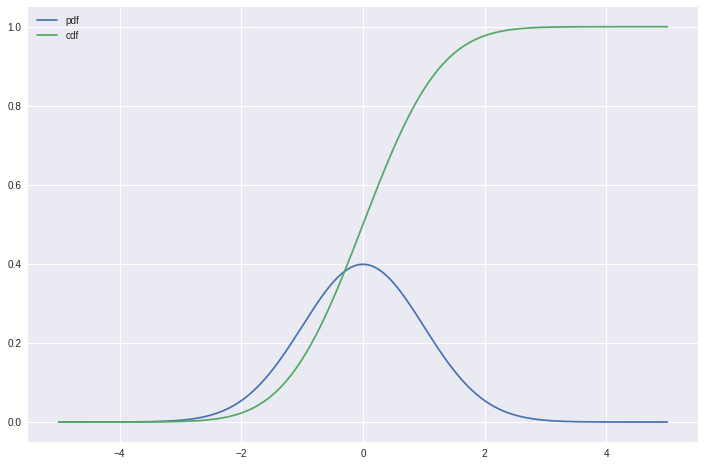

In [233]:


# ploteamos densidad y la acumulada

x = np.linspace(-5, 5, 5000)
mu = 0
sigma = 1

y_pdf = ss.norm.pdf(x, mu, sigma) # normal pdf
y_cdf = ss.norm.cdf(x, mu, sigma) # normal cdf

plt.plot(x, y_pdf, label='pdf')
plt.plot(x, y_cdf, label='cdf')
plt.legend();


In [239]:
data_normal0 = np.random.normal(mu1, sigma1, size = 10)
data_normal1 = np.random.normal(mu1, sigma1, size = 100)
data_normal2 = np.random.normal(mu1, sigma1, size = 1000)
data_normal3 = np.random.normal(mu1, sigma1, size = 10000)

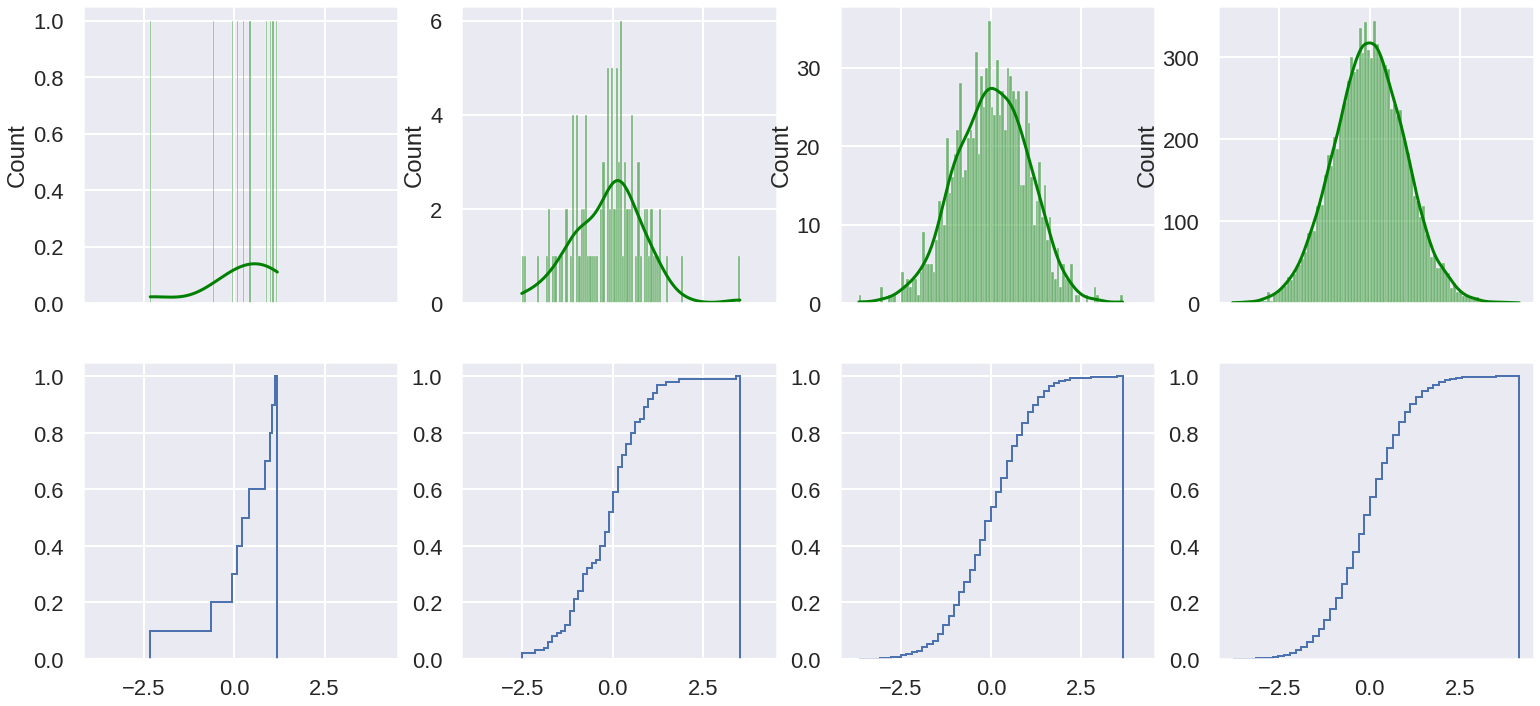

In [240]:
sns.set_context("poster")
fig, ax = plt.subplots(2,4, sharex=True, figsize= (26,12), sharey = False)

sns.histplot(data_normal0, bins=100, kde=True, color='green',ax= ax[0,0] )
sns.histplot(data_normal1, bins=100, kde=True, color='green',ax= ax[0,1] )
sns.histplot(data_normal2, bins=100, kde=True, color='green',ax= ax[0,2] )
sns.histplot(data_normal3, bins=100, kde=True, color='green',ax= ax[0,3] )

ax[1,0].hist(data_normal0, n_bins, density=True, histtype='step', cumulative=True, label='Empirical', alpha = 1, color = 'b')
ax[1,1].hist(data_normal1, n_bins, density=True, histtype='step', cumulative=True, label='Empirical', alpha = 1, color = 'b')
ax[1,2].hist(data_normal2, n_bins, density=True, histtype='step', cumulative=True, label='Empirical', alpha = 1, color = 'b')
ax[1,3].hist(data_normal3, n_bins, density=True, histtype='step', cumulative=True, label='Empirical', alpha = 1, color = 'b')

plt.grid(False)
plt.show()